In [21]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
file1=pd.read_csv(mouse_drug_data_to_load)
file2=pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset

file=pd.merge(file2,file1,on="Mouse ID")
# Display the data table for preview
file.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [22]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
Tumor=file.groupby(["Drug","Timepoint"])
Tumor_mean=Tumor["Tumor Volume (mm3)"].mean()
# Convert to DataFrame
TR_df=pd.DataFrame(Tumor_mean)
TR_df=TR_df.reset_index()
#TR_df=pd.DataFrame(Tumor["Tumor Volume (mm3)"].mean())
# Preview DataFrame
TR_df

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [23]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
Tumor_sem=Tumor["Tumor Volume (mm3)"].sem()
# Convert to DataFrame
SE_df=pd.DataFrame(Tumor_sem)
SE_df=SE_df.reset_index()

# Preview DataFrame

SE_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [24]:
# Minor Data Munging to Re-Format the Data Frames
formatted_df=pd.pivot_table(TR_df,values="Tumor Volume (mm3)", index=["Timepoint"],columns=["Drug"])
# Preview that Reformatting worked
formatted_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [25]:
formatted_df_se=pd.pivot_table(SE_df,values="Tumor Volume (mm3)", index=["Timepoint"],columns=["Drug"])

formatted_df_se.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


FileNotFoundError: [Errno 2] No such file or directory: '../Images/tumor response.png'

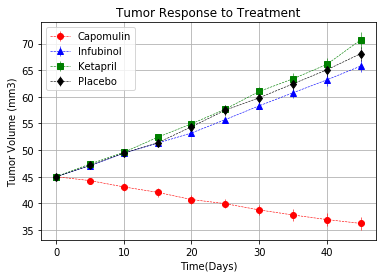

In [26]:
# Generate the Plot (with Error Bars)
x_limit=50
x_axis=np.arange(0,x_limit,5)


Cap_tumor_v=formatted_df["Capomulin"]
Cap_sem=formatted_df_se["Capomulin"]
Infu_tumor_v=formatted_df["Infubinol"]
Infu_sem=formatted_df_se["Infubinol"]
Keta_tumor_v=formatted_df["Ketapril"]
Keta_sem=formatted_df_se["Ketapril"]
Pla_tumor_v=formatted_df["Placebo"]
Pla_sem=formatted_df_se["Placebo"]


fig, ax=plt.subplots()
ax.errorbar(x_axis,Cap_tumor_v,yerr=Cap_sem,color="red",label="Capomulin",fmt="o",linestyle="--",linewidth=0.6)
ax.errorbar(x_axis,Infu_tumor_v,yerr=Infu_sem,color="blue",label="Infubinol",fmt="^",linestyle="--",linewidth=0.6)
ax.errorbar(x_axis,Keta_tumor_v,yerr=Keta_sem,color="green",label="Ketapril",fmt="s",linestyle="--",linewidth=0.6)
ax.errorbar(x_axis,Pla_tumor_v,yerr=Pla_sem,color="black",label="Placebo",fmt="d",linestyle="--",linewidth=0.6)


ax.set_xlabel("Time(Days)")
ax.set_ylabel("Tumor Volume (mm3)")
ax.legend()
plt.title("Tumor Response to Treatment")
ax.grid()


# Save the Figure
plt.savefig('../Images/tumor response.png')
plt.show()

## Metastatic Response to Treatment

In [27]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
Met=file.groupby(["Drug","Timepoint"])
Met_mean=Tumor["Metastatic Sites"].mean()
# Convert to DataFrame
MR_df=pd.DataFrame(Met_mean)
# Preview DataFrame
MR_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [28]:
# Store the standard error Met. Site Data Grouped by Drug and Timepoint 
Met=file.groupby(["Drug","Timepoint"])
Met_sem=Tumor["Metastatic Sites"].sem()
# Convert to DataFrame
MRSE_df=pd.DataFrame(Met_sem)
# Preview DataFrame
MRSE_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [29]:
# Minor Data Munging to Re-Format the Data Frames
formatted2_df=pd.pivot_table(MR_df,values="Metastatic Sites", index=["Timepoint"],columns=["Drug"])
# Preview that Reformatting worked
formatted2_df.head()



Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [30]:
formatted2_df_se=pd.pivot_table(MRSE_df,values="Metastatic Sites", index=["Timepoint"],columns=["Drug"])

formatted2_df_se.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


FileNotFoundError: [Errno 2] No such file or directory: '../Images/metastatic spread.png'

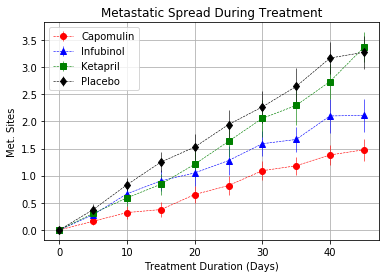

In [31]:
# Generate the Plot (with Error Bars)
x_limit=50
x_axis=np.arange(0,x_limit,5)


Cap_m=formatted2_df["Capomulin"]
Cap_sem_m=formatted2_df_se["Capomulin"]
Infu_m=formatted2_df["Infubinol"]
Infu_sem_m=formatted2_df_se["Infubinol"]
Keta_m=formatted2_df["Ketapril"]
Keta_sem_m=formatted2_df_se["Ketapril"]
Pla_m=formatted2_df["Placebo"]
Pla_sem_m=formatted2_df_se["Placebo"]


fig, ax=plt.subplots()
ax.errorbar(x_axis,Cap_m,yerr=Cap_sem_m,color="red",label="Capomulin",fmt="o",linestyle="--",linewidth=0.6)
ax.errorbar(x_axis,Infu_m,yerr=Infu_sem_m,color="blue",label="Infubinol",fmt="^",linestyle="--",linewidth=0.6)
ax.errorbar(x_axis,Keta_m,yerr=Keta_sem_m,color="green",label="Ketapril",fmt="s",linestyle="--",linewidth=0.6)
ax.errorbar(x_axis,Pla_m,yerr=Pla_sem_m,color="black",label="Placebo",fmt="d",linestyle="--",linewidth=0.6)


ax.set_xlabel("Treatment Duration (Days)")
ax.set_ylabel("Met. Sites")
ax.legend()
ax.grid()
plt.title("Metastatic Spread During Treatment")
##plt.show()

# Save the Figure
plt.savefig('../Images/metastatic spread.png')
plt.show()

## Survival Rates

In [32]:
file.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [33]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_group=file.groupby(["Drug","Timepoint"])
mouse_count=mouse_group["Mouse ID"].count()

# Convert to DataFrame
mouse_df=pd.DataFrame(mouse_count)
mouse_df_rename=mouse_df.rename(columns={"Mouse ID":"Mouse Count"})
mouse_df_rename=mouse_df_rename.reset_index()
# Preview DataFrame
mouse_df_rename.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [34]:
# Minor Data Munging to Re-Format the Data Frames
formatted_mouse=pd.pivot_table(mouse_df_rename,values="Mouse Count",index=["Timepoint"],columns=["Drug"])
# Preview the Data Frame
formatted_mouse

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [35]:
#transfer the value above to percentage 

In [36]:
#formatted_mouse_p=formatted_mouse
#col=list(formatted_mouse.columns)
#print(len(col))
#for i in range(len(col)):
    #formatted_mouse_p[col[i]]=formatted_mouse_p[col[i]]*100/formatted_mouse_p.iloc[0,i]
#formatted_mouse_p
#.iloc[[0]]
#percentage=[""]
#mouse_df_rename["Mouse Percentage"]=percentage



In [37]:
#easier and more intuitive way to get percentage of value
Cap_survival=100*formatted_mouse["Capomulin"]/formatted_mouse["Capomulin"].max()
Infu_survival=100*formatted_mouse["Infubinol"]/formatted_mouse["Infubinol"].max()
Keta_survival=100*formatted_mouse["Ketapril"]/formatted_mouse["Ketapril"].max()
Pla_survival=100*formatted_mouse["Placebo"]/formatted_mouse["Placebo"].max()

FileNotFoundError: [Errno 2] No such file or directory: '../Images/survival during treatment.png'

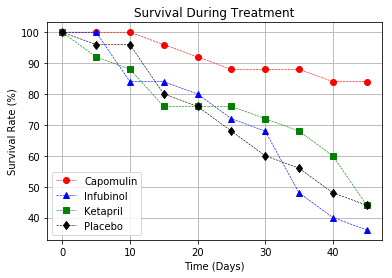

In [38]:
# Generate the Plot (Accounting for percentages)
x_limit=50
x_axis=np.arange(0,x_limit,5)



# use marker instead of fmt
plt.plot(x_axis,Cap_survival,color="red",label="Capomulin",marker= "o",linestyle="--",linewidth=0.6)
plt.plot(x_axis,Infu_survival,color="blue",label="Infubinol",marker="^",linestyle="--",linewidth=0.6)
plt.plot(x_axis,Keta_survival,color="green",label="Ketapril",marker="s",linestyle="--",linewidth=0.6)
plt.plot(x_axis,Pla_survival,color="black",label="Placebo",marker="d",linestyle="--",linewidth=0.6)

plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.legend()
plt.grid()
plt.title("Survival During Treatment")


# Save the Figure
plt.savefig('../Images/survival during treatment.png')
# Show the Figure
plt.show()

## Summary Bar Graph

In [39]:
# Calculate the percent changes for each drug
tumor_change=(formatted_df.iloc[-1]-formatted_df.iloc[0])/formatted_df.iloc[0]*100

# Display the data to confirm
tumor_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

FileNotFoundError: [Errno 2] No such file or directory: '../Images/Summary bar graph.png'

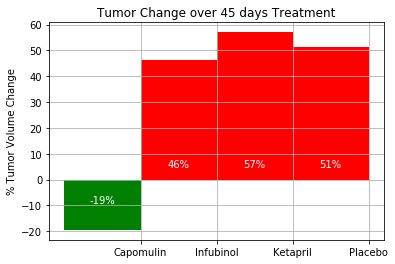

In [53]:
# Store all Relevant Percent Changes into a Tuple
#tuples = tuple([x for x in tumor_change.values])
# Splice the data between passing and failing drugs
passing=tumor_change<0
# Orient widths. Add labels, tick marks, etc. 
xtick=["Capomulin","Infubinol","Ketapril","Placebo"]
percent_change=[(tumor_change[drug]) for drug in xtick]

chart=plt.bar(xtick,percent_change,width=-1,align='edge',color=passing.map({True:'g',False:'r'}))               
plt.ylabel("% Tumor Volume Change")
plt.grid()
plt.y_lim=(-30,70)
plt.title("Tumor Change over 45 days Treatment")

# Use functions to label the percentages of changes
#reference of code from: https://stackoverflow.com/questions/7423445/how-can-i-display-text-over-columns-in-a-bar-chart-in-matplotlib
def label(rects):
    for rect in rects:
        height = rect.get_height()
        if height > 0:
            label_position = 4
        else:
            label_position = -10
        plt.text(rect.get_x() + rect.get_width()/2., label_position,
                '%d' % int(height)+'%',color='white',
                ha='center', va='bottom')
# Call functions to implement the function calls
label(chart)

# Save the Figure
plt.savefig('../Images/Summary bar graph.png')

# Show the Figure
plt.show()